In [1]:
import stackview

import pyclesperanto_prototype as cle
from skimage.data import cells3d
import matplotlib.pyplot as plt
from napari_segment_blobs_and_things_with_membranes import seeded_watershed
import numpy as np

cl.OCLArray([[26.001995 , 30.142883 , 39.691216 , ..., 16.870068 , 15.499411 ,
        15.279642 ],
       [26.21598  , 29.76118  , 43.6933   , ..., 16.442099 , 16.523066 ,
        15.892679 ],
       [26.8348   , 35.174408 , 48.880978 , ..., 19.501497 , 17.575638 ,
        18.090357 ],
       ...,
       [ 7.7439218,  8.114057 ,  7.859589 , ..., 25.782228 , 24.949425 ,
        27.73122  ],
       [ 8.518892 ,  9.022045 ,  9.380613 , ..., 22.942596 , 26.204412 ,
        24.313253 ],
       [ 7.9810395,  7.911639 ,  9.536764 , ..., 17.876371 , 20.577202 ,
        21.294338 ]], dtype=float32)
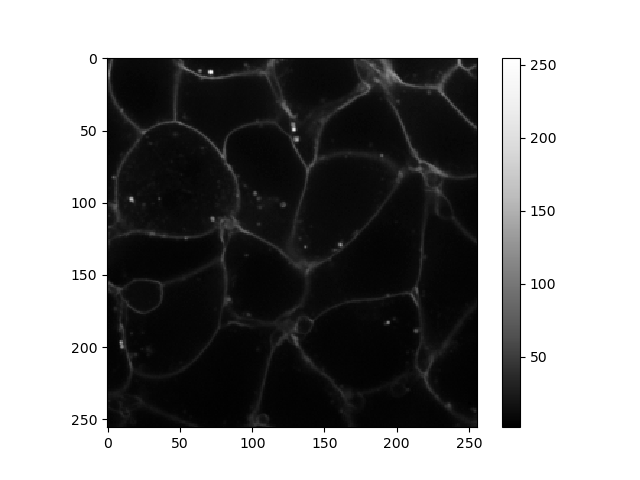
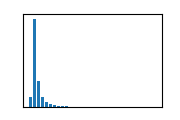

In [2]:
# load image
image = cells3d()
membrane2d = cle.asarray(image[30,0])
membrane2d = membrane2d * 255 / membrane2d.max()
membrane2d

In [3]:
def segment_image(image, 
                  blur_sigma:float = 2,
                  threshold:float = 11,
                  smooth_outline_radius:int=5, 
                  image_brightness:float=1.5, 
                  show_image:bool=True, 
                  show_border:bool=True):
    
    labels = seeded_watershed(membrane2d, 
            cle.label(
                cle.gaussian_blur(
                    membrane2d, 
                    sigma_x=blur_sigma, 
                    sigma_y=blur_sigma) 
                < threshold
            )
         )
    
    processed = \
      cle.detect_label_edges(
        cle.extend_labeling_via_voronoi(
            cle.opening_labels(labels, radius=smooth_outline_radius)
        )
      ) * 255
    
    if show_image and show_border:
        return stackview.merge_rgb(image * image_brightness, processed, image * image_brightness)
    elif show_image:
        return image * image_brightness
    elif show_border:
        return processed
    else:
        return np.zeros(processed.shape)
    
stackview.interact(segment_image, membrane2d, continuous_update=True)

(256, 256, 3)